# Cargar Dataset

In [2]:
# crear directorios
!mkdir Trash
!mkdir Organics

In [4]:
# descomprimir archivos
%cd Organics
!unzip Food-Organics.zip
%cd ..

%cd Trash
!unzip Trash.zip
%cd ..

[Errno 2] No such file or directory: 'Organics'
/content/Organics
Archive:  Food-Organics.zip
   creating: Food Organics/
  inflating: Food Organics/Food Organics_1.jpg  
  inflating: Food Organics/Food Organics_10.jpg  
  inflating: Food Organics/Food Organics_100.jpg  
  inflating: Food Organics/Food Organics_101.jpg  
  inflating: Food Organics/Food Organics_102.jpg  
  inflating: Food Organics/Food Organics_103.jpg  
  inflating: Food Organics/Food Organics_104.jpg  
  inflating: Food Organics/Food Organics_105.jpg  
  inflating: Food Organics/Food Organics_106.jpg  
  inflating: Food Organics/Food Organics_107.jpg  
  inflating: Food Organics/Food Organics_108.jpg  
  inflating: Food Organics/Food Organics_109.jpg  
  inflating: Food Organics/Food Organics_11.jpg  
  inflating: Food Organics/Food Organics_110.jpg  
  inflating: Food Organics/Food Organics_111.jpg  
  inflating: Food Organics/Food Organics_112.jpg  
  inflating: Food Organics/Food Organics_113.jpg  
  inflating: Fo

In [6]:
# eliminar archivos zip
!rm -rf /content/Organics/Food-Organics.zip
!rm -rf /content/Trash/Trash.zip

In [10]:
# mostrar cuantas imagenes hay de cada clase
!ls /content/Organics/Food-Organics/*.jpg | wc -l # 411
!ls /content/Trash/Trash/*.jpg | wc -l # 495

411
495


# Representación gráfica de los datos

In [17]:
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

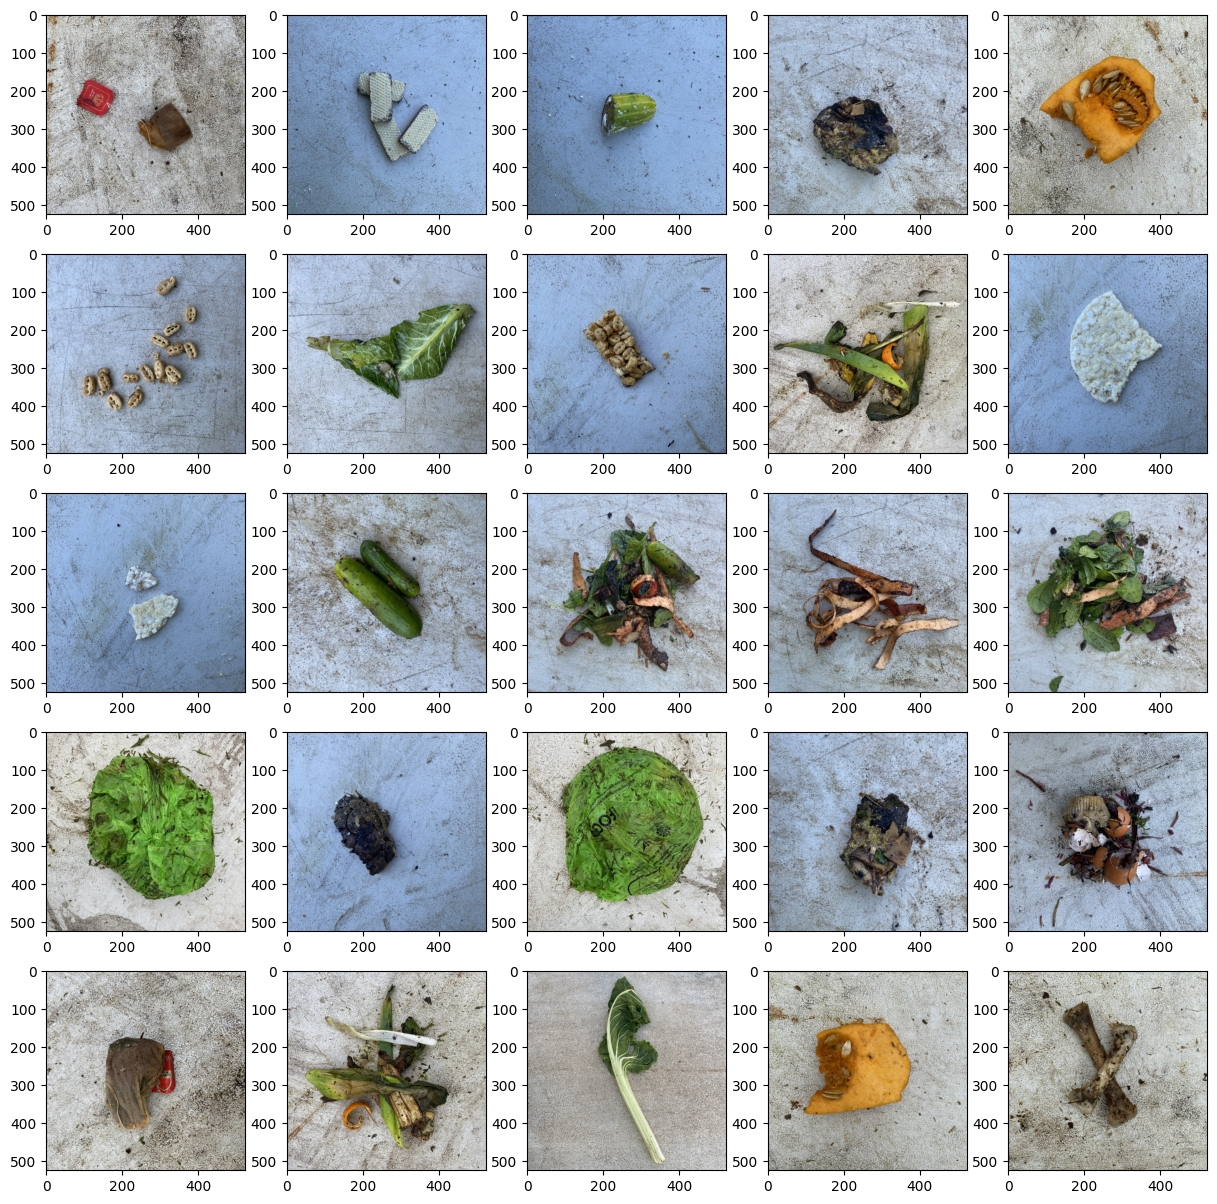

In [11]:
plt.figure(figsize=(15,15))

carpeta = '/content/Organics/Food-Organics'
imagenes = os.listdir(carpeta)

for i, nombreimg in enumerate(imagenes[:25]):
  plt.subplot(5,5,i+1)
  imagen = mpimg.imread(carpeta + '/' + nombreimg)
  plt.imshow(imagen)

# Crear Dataset

In [13]:
import shutil

In [12]:
!mkdir dataset
!mkdir dataset/Organics
!mkdir dataset/Trash

In [14]:
carpeta_fuente = '/content/Organics/Food-Organics'
carpeta_destino = '/content/dataset/Organics'

imagenes = os.listdir(carpeta_fuente)

for i, nombreimg in enumerate(imagenes):
  if i < 411:
    shutil.copy(carpeta_fuente + '/' + nombreimg, carpeta_destino + '/' + nombreimg)

In [15]:
carpeta_fuente = '/content/Trash/Trash'
carpeta_destino = '/content/dataset/Trash'

imagenes = os.listdir(carpeta_fuente)

for i, nombreimg in enumerate(imagenes):
  if i < 411:
    shutil.copy(carpeta_fuente + '/' + nombreimg, carpeta_destino + '/' + nombreimg)

In [16]:
# mostrar cuantas imagenes hay de cada clase
!ls /content/dataset/Organics/*.jpg | wc -l # 411
!ls /content/dataset/Trash/*.jpg | wc -l # 411

411
411


# Preprocesar imágenes

In [19]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array
import numpy as np

In [21]:
os.getcwd()

'/content'

In [22]:
dataset_dir = "dataset"
img_height, img_width = 150, 150
batch_size = 32
epochs = 100

In [23]:
train_datagen = ImageDataGenerator(
    rescale = 1./255,
    validation_split = 0.2,  # 20% para validar
    rotation_range = 30,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
    fill_mode = 'nearest'
)

# Dividir conjunto de Entrenamiento / Validación

In [24]:
train_generator = train_datagen.flow_from_directory(
    dataset_dir,
    target_size=(img_height, img_width),
    batch_size = batch_size,
    class_mode = 'binary',
    subset = 'training',
    shuffle = True
)

Found 658 images belonging to 2 classes.


In [25]:
validation_generator = train_datagen.flow_from_directory(
    dataset_dir,
    target_size=(img_height, img_width),
    batch_size = batch_size,
    class_mode = 'binary',
    subset = 'validation',
    shuffle = False
)

Found 164 images belonging to 2 classes.


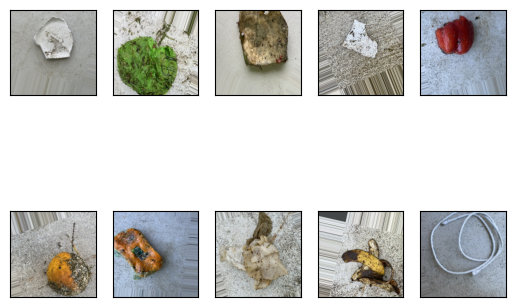

In [26]:
for imagen, etiqueta in train_generator:
  for i in range(10):
    plt.subplot(2,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(imagen[i])
  break
plt.show()

# Construir Redes Neuronales Convolucionales

In [33]:
import tensorflow as tf
from tensorflow.keras import models, layers, optimizers
from tensorflow.keras.callbacks import EarlyStopping

In [30]:
cnn = models.Sequential()

cnn.add(layers.Conv2D(32, (3,3), activation='relu', input_shape= (img_height, img_width, 3)))
cnn.add(layers.MaxPooling2D(2, 2))

cnn.add(layers.Conv2D(64, (3, 3), activation='relu'))
cnn.add(layers.MaxPooling2D(2, 2))

cnn.add(layers.Conv2D(128, (3, 3), activation='relu'))
cnn.add(layers.MaxPooling2D(2, 2))

cnn.add(layers.Conv2D(256, (3, 3), activation='relu'))
cnn.add(layers.MaxPooling2D(2, 2))

cnn.add(layers.GlobalAveragePooling2D())

cnn.add(layers.Dense(128, activation='relu'))
cnn.add(layers.Dropout(0.5))

cnn.add(layers.Dense(1, activation='sigmoid'))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [31]:
cnn.compile(
    optimizer = optimizers.Adam(learning_rate=0.0001),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

cnn.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 15, 15, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 7, 7, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 256)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 421,441 (1.61 MB)

 Trainable params: 421,441 (1.61 MB)

 Non-trainable params: 0 (0.00 B)

# Entrenar CNN

In [34]:
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

history = cnn.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=epochs,
    callbacks=[early_stop]
)

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 19s 595ms/step - accuracy: 0.4828 - loss: 0.6960 - val_accuracy: 0.5000 - val_loss: 0.6900
Epoch 2/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 7s 356ms/step - accuracy: 0.4781 - loss: 0.6915 - val_accuracy: 0.5915 - val_loss: 0.6837
Epoch 3/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 10s 358ms/step - accuracy: 0.6122 - loss: 0.6793 - val_accuracy: 0.6402 - val_loss: 0.6720
Epoch 4/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 7s 317ms/step - accuracy: 0.6953 - loss: 0.6639 - val_accuracy: 0.6707 - val_loss: 0.6340
Epoch 5/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 8s 385ms/step - accuracy: 0.7084 - loss: 0.6315 - val_accuracy: 0.9085 - val_loss: 0.5442
Epoch 6/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 7s 314ms/step - accuracy: 0.7661 - loss: 0.5745 - val_accuracy: 0.9695 - val_loss: 0.4305
Epoch 7/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 8s 355ms/step - accuracy: 0.8133 - loss: 0.5108 - val_accuracy: 0.9024 - val_loss: 0.3791
Epoch 8/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 8s 366ms/step - accuracy: 0.7807 - loss: 0.4860 - val_ac

## Métricas del entrenamiento

In [35]:
from sklearn.metrics import confusion_matrix, classification_report

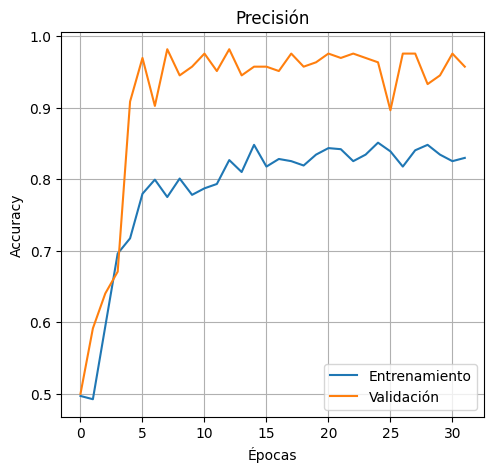

In [36]:
plt.figure(figsize=(12,5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Entrenamiento')
plt.plot(history.history['val_accuracy'], label='Validación')
plt.title('Precisión')
plt.xlabel('Épocas')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()

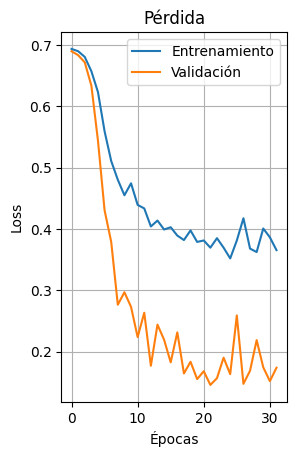

In [37]:
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Entrenamiento')
plt.plot(history.history['val_loss'], label='Validación')
plt.title('Pérdida')
plt.xlabel('Épocas')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()

## Evaluar rendimiento del modelo

In [38]:
# predicciones en validación
val_preds = cnn.predict(validation_generator)
val_preds = (val_preds > 0.5).astype("int32")

# etiquetas reales
val_labels = validation_generator.classes

# matriz de confusión y reporte
print(confusion_matrix(val_labels, val_preds))
print(classification_report(val_labels, val_preds, target_names=validation_generator.class_indices.keys()))

6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 219ms/step
[[79  3]
 [ 4 78]]
              precision    recall  f1-score   support

    Organics       0.95      0.96      0.96        82
       Trash       0.96      0.95      0.96        82

    accuracy                           0.96       164
   macro avg       0.96      0.96      0.96       164
weighted avg       0.96      0.96      0.96       164



In [40]:
score = cnn.evaluate(validation_generator)

print(f'Test loss: {score[0]:.4f}')
print(f'Test accuracy: {score[1]:.4f}')

6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 206ms/step - accuracy: 0.9881 - loss: 0.1444
Test loss: 0.1369
Test accuracy: 0.9756


# Predicción de nuevas entradas

In [39]:
import requests
from io import BytesIO
from PIL import Image

In [43]:
def predict_image(image_path_or_url, modelo):
    # Cargar imagen desde url o desde archivo local
    if image_path_or_url.startswith('http'):
        response = requests.get(image_path_or_url)
        img = Image.open(BytesIO(response.content)).convert('RGB')
    else:
        img = Image.open(image_path_or_url).convert('RGB')

    # Preprocesar imagen como entrada del modelo
    img = img.resize((img_width, img_height))
    img_array = img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)

    # Predecir
    prob = modelo.predict(img_array)[0][0]
    label = "Orgánica" if prob < 0.5 else "Inorgánica"
    confidence = (1 - prob) if prob < 0.5 else prob

    # Mostrar imagen y resultado
    plt.imshow(img)
    plt.title(f"Predicción: {label} ({confidence*100:.2f}%)")
    plt.axis('off')
    plt.show()

    return label, confidence

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


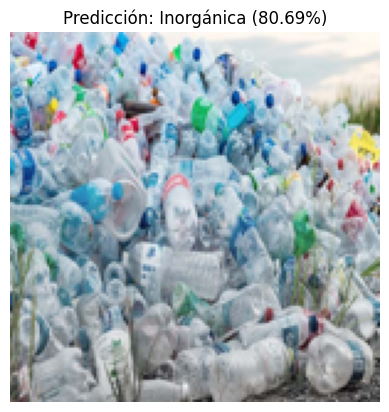

('Inorgánica', np.float32(0.80690074))

In [47]:
predict_image(
    'https://www.yoinfluyo.com/wp-content/uploads/2021/09/basura_plastica.jpg',
    cnn)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


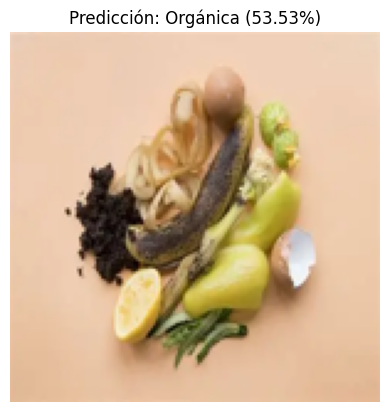

('Orgánica', np.float32(0.5353266))

In [48]:
predict_image(
    'https://tse4.mm.bing.net/th/id/OIP.NGSE7nPJR5Zx6jC8-0Tb5gHaE8?rs=1&pid=ImgDetMain&o=7&rm=3',
    cnn
)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


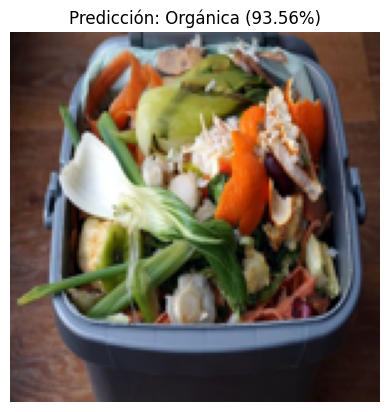

('Orgánica', np.float32(0.9355731))

In [49]:
predict_image(
    'https://ehq-production-canada.imgix.net/8438239c2a1a0c8bd536e5d5492b273dbd159a7d/original/1592599379/Homepage_image.png_0fe40aa7d594e3c86935e99d249803e6?auto=compress%2Cformat&w=1080',
    cnn
)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


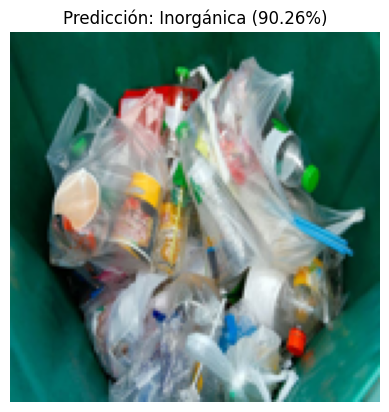

('Inorgánica', np.float32(0.9025832))

In [52]:
predict_image(
    'https://thumbs.dreamstime.com/b/waste-plastic-garbage-waste-bin-green-trash-rubbish-pollution-waste-plastic-garbage-waste-bin-green-trash-rubbish-191918654.jpg',
    cnn
)